In [1]:
import pandas as pd
import numpy as np
import missing
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import janitor

In [2]:
riskfactors = pd.read_csv("./data/riskfactors.csv")
riskfactors.head(2)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190.0,64.0,32.68,Married,NaN,0,6.0,...,No,NaN,NaN,NaN,1095.0,261.0,104.0,156.0,521.0,12.0
1,40,Female,48,170.0,68.0,25.90,Divorced,NaN,0,5.0,...,No,NaN,NaN,NaN,52.0,209.0,52.0,0.0,52.0,0.0


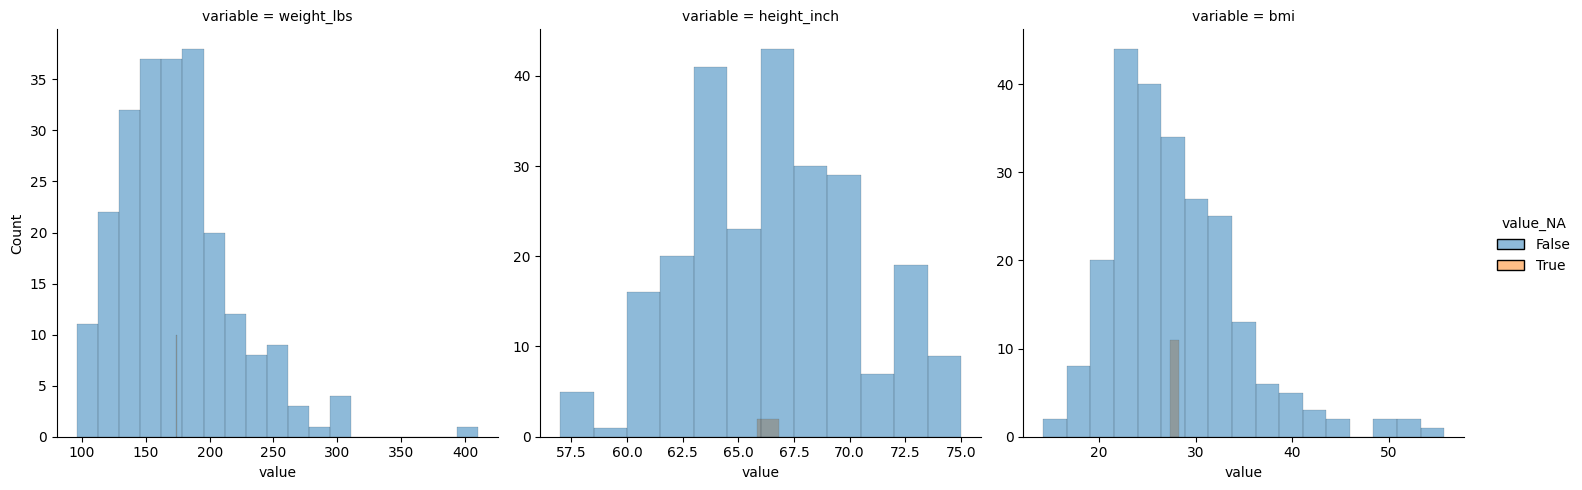

In [12]:
(
    riskfactors
    .select('weight_lbs', 'height_inch', 'bmi')
    .missing.bind_shadow_matrix(true_string= True, false_string= False)
    .apply(
        axis= 'rows',
        func= lambda column: column.fillna(column.mean()) if '_NA' not in column.name else column
    )
    .pivot_longer(
        index= '*_NA'
    )
    .pivot_longer(
        index= ['variable', 'value'],
        names_to= 'variable_NA',
        values_to= 'value_NA'
    )
    .assign(
        valid= lambda df: df.apply(axis= 'columns', func= lambda column: column.variable in column.variable_NA)
    )
    .query('valid')
    .pipe(
        lambda df: (
            sns.displot(
                data= df,
                x= 'value',
                hue= 'value_NA',
                col= 'variable',
                common_bins= False,
                facet_kws= {
                    'sharex': False,
                    'sharey': False
                }
            )
        )
    )
)